# Sentiment Analysis with Modular Structure

Đây là demo sử dụng cấu trúc modular cho dự án Sentiment Analysis. 

## Cấu trúc dự án:
- `src/data/` - Data loading và preprocessing 
- `src/models/` - Định nghĩa các model 
- `src/training/` - Training logic
- `src/evaluation/` - Evaluation và metrics
- `src/utils/` - Utility functions

Trong notebook này chúng ta sẽ:
1. Load và preprocess dữ liệu Twitter
2. Xây dựng frequency dictionary
3. Extract features 
4. Train Logistic Regression model
5. Evaluate model performance
6. Test trên custom tweets

## 1. Import Libraries và Setup

In [52]:
# Install required packages if not already installed
import subprocess
import sys

def install_package(package):
    try:
        __import__(package.replace('-', '_'))
        return True
    except ImportError:
        return False

packages_to_check = {
    'scikit-learn': 'sklearn',
    'seaborn': 'seaborn',
    'nltk': 'nltk'
}

missing_packages = []
for package, import_name in packages_to_check.items():
    if not install_package(import_name):
        missing_packages.append(package)

if missing_packages:
    print(f"Installing missing packages: {', '.join(missing_packages)}")
    for package in missing_packages:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
    print("✅ All packages installed successfully!")
else:
    print("✅ All required packages are already installed!")

✅ All required packages are already installed!


In [53]:
# Add src to path for imports
import sys
import os
src_path = os.path.abspath('src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check and import our modules
try:
    from data.data_loader import DataLoader
    from data.preprocessing import TextPreprocessor, process_tweet
    from models.logistic_regression import LogisticRegressionModel
    from training.trainer import ModelTrainer
    from evaluation.evaluator import ModelEvaluator, predict_tweet_sentiment
    from utils.features import (
        build_frequency_dict, 
        extract_features, 
        build_feature_matrix,
        print_vocabulary_analysis,
        save_model_artifacts
    )
    print("✅ All modules imported successfully!")
    
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("Please make sure all required packages are installed and the src directory structure is correct.")
    raise

✅ All modules imported successfully!


## 2. Load và Preprocess Data

In [54]:
# Initialize data loader
data_loader = DataLoader(raw_data_path="dataset/raw")

# Load Twitter samples
print("Loading Twitter data...")
train_x, test_x, train_y, test_y = data_loader.load_twitter_samples(save_to_file=True)

print(f"\nDataset sizes:")
print(f"Training: {len(train_x)} tweets")
print(f"Testing: {len(test_x)} tweets")
print(f"Labels shape - Train: {train_y.shape}, Test: {test_y.shape}")

Loading Twitter data...
Loading Twitter samples from NLTK...
Loaded Twitter samples: 8000 training, 2000 test samples
Twitter data saved to dataset/raw/

Dataset sizes:
Training: 8000 tweets
Testing: 2000 tweets
Labels shape - Train: (8000, 1), Test: (2000, 1)
Loaded Twitter samples: 8000 training, 2000 test samples
Twitter data saved to dataset/raw/

Dataset sizes:
Training: 8000 tweets
Testing: 2000 tweets
Labels shape - Train: (8000, 1), Test: (2000, 1)


In [55]:
# Look at some sample data
print("Sample positive tweet:")
print(f"Original: {train_x[0]}")
print(f"Processed: {process_tweet(train_x[0])}")
print()

print("Sample negative tweet:")
print(f"Original: {train_x[4000]}")  # First negative tweet
print(f"Processed: {process_tweet(train_x[4000])}")

Sample positive tweet:
Original: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Processed: ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

Sample negative tweet:
Original: hopeless for tmr :(
Processed: ['hopeless', 'tmr', ':(']


## 3. Build Frequency Dictionary

In [56]:
# Build frequency dictionary
print("Building frequency dictionary...")
freqs = build_frequency_dict(train_x, train_y, process_tweet)

# Analyze vocabulary
print_vocabulary_analysis(freqs)

Building frequency dictionary...
Building frequency dictionary...
Built frequency dictionary with 11397 word-label pairs
VOCABULARY ANALYSIS
Total unique words: 9143
Words appearing in positive tweets: 5787
Words appearing in negative tweets: 5610
Words appearing in both classes: 2254
Total positive word occurrences: 27208
Total negative word occurrences: 26690

Top 10 Positive Words:
 1. :)              (2960 times)
 2. :-)             ( 552 times)
 3. :d              ( 523 times)
 4. thank           ( 522 times)
 5. follow          ( 385 times)
 6. love            ( 336 times)
 7. ...             ( 228 times)
 8. u               ( 204 times)
 9. good            ( 191 times)
10. day             ( 187 times)

Top 10 Negative Words:
 1. :(              (3675 times)
 2. :-(             ( 386 times)
 3. ...             ( 283 times)
 4. follow          ( 246 times)
 5. pleas           ( 243 times)
 6. miss            ( 239 times)
 7. ♛               ( 210 times)
 8. 》               ( 210 t

## 4. Feature Extraction

In [57]:
# Build feature matrices
print("Extracting features...")
X_train = build_feature_matrix(train_x, freqs, process_tweet)
X_test = build_feature_matrix(test_x, freqs, process_tweet)

print(f"\nFeature matrix shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Look at some sample features
print(f"\nSample features for first 3 training tweets:")
for i in range(3):
    print(f"Tweet {i+1}: {X_train[i]} - Label: {int(train_y[i][0])}")

Extracting features...
Building feature matrix for 8000 tweets...
Processed 1000/8000 tweets
Processed 1000/8000 tweets
Processed 2000/8000 tweets
Processed 2000/8000 tweets
Processed 3000/8000 tweets
Processed 3000/8000 tweets
Processed 4000/8000 tweets
Processed 4000/8000 tweets
Processed 5000/8000 tweets
Processed 5000/8000 tweets
Processed 6000/8000 tweets
Processed 6000/8000 tweets
Processed 7000/8000 tweets
Processed 7000/8000 tweets
Processed 8000/8000 tweets
Feature matrix shape: (8000, 3)
Building feature matrix for 2000 tweets...
Processed 8000/8000 tweets
Feature matrix shape: (8000, 3)
Building feature matrix for 2000 tweets...
Processed 1000/2000 tweets
Processed 1000/2000 tweets
Processed 2000/2000 tweets
Feature matrix shape: (2000, 3)

Feature matrix shapes:
X_train: (8000, 3)
X_test: (2000, 3)

Sample features for first 3 training tweets:
Tweet 1: [1.000e+00 3.133e+03 6.100e+01] - Label: 1
Tweet 2: [1.000e+00 3.705e+03 4.440e+02] - Label: 1
Tweet 3: [1.000e+00 3.119e+0

## 5. Train Logistic Regression Model

In [58]:
# Reload modules to get latest changes
import importlib
import sys

modules_to_reload = [
    'models.logistic_regression',
    'training.trainer',
    'evaluation.evaluator'  # Add evaluator to reload list
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
        print(f"Reloaded {module_name}")
    else:
        print(f"{module_name} not found in sys.modules")

# Re-import the classes
from models.logistic_regression import LogisticRegressionModel
from training.trainer import ModelTrainer
from evaluation.evaluator import ModelEvaluator, predict_tweet_sentiment

print("✅ Modules reloaded and classes re-imported!")

Reloaded models.logistic_regression
Reloaded training.trainer
Reloaded evaluation.evaluator
✅ Modules reloaded and classes re-imported!


Training Logistic Regression model...
TRAINING LOGISTIC REGRESSION MODEL
Training Logistic Regression with 8000 samples, 3 features
Learning rate: 1e-09, Iterations: 10000
Iteration 1000/10000, Loss: 0.27783604
Iteration 2000/10000, Loss: 0.19444070
Iteration 3000/10000, Loss: 0.15997519
Iteration 2000/10000, Loss: 0.19444070
Iteration 3000/10000, Loss: 0.15997519
Iteration 4000/10000, Loss: 0.14102645
Iteration 5000/10000, Loss: 0.12890025
Iteration 4000/10000, Loss: 0.14102645
Iteration 5000/10000, Loss: 0.12890025
Iteration 6000/10000, Loss: 0.12037826
Iteration 7000/10000, Loss: 0.11399842
Iteration 6000/10000, Loss: 0.12037826
Iteration 7000/10000, Loss: 0.11399842
Iteration 8000/10000, Loss: 0.10900061
Iteration 9000/10000, Loss: 0.10494996
Iteration 8000/10000, Loss: 0.10900061
Iteration 9000/10000, Loss: 0.10494996
Iteration 10000/10000, Loss: 0.10157921
Training completed. Final loss: 0.10157921
Final weights: [np.float64(3e-07), np.float64(0.00127323), np.float64(-0.001111)]


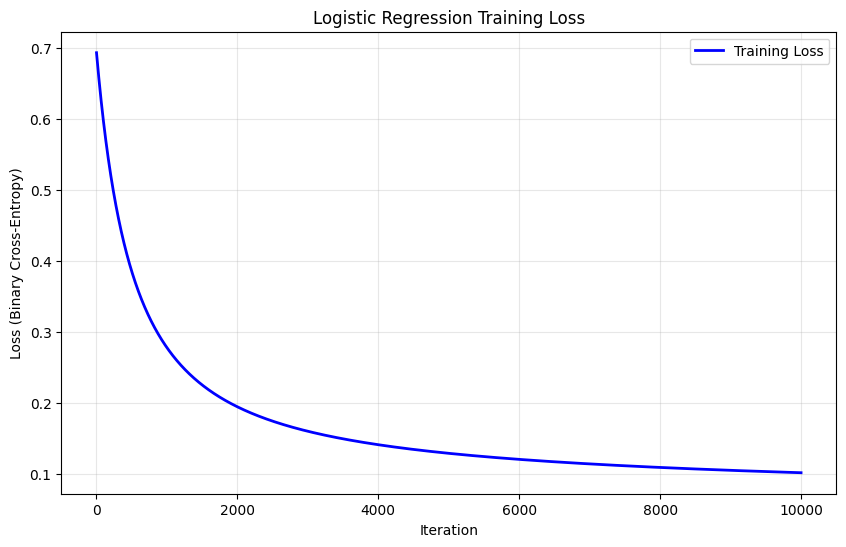

Model saved to: models\twitter_sentiment_lr.pkl
Weights saved to: models\twitter_sentiment_lr_weights.npy


In [59]:
# Initialize trainer
trainer = ModelTrainer(model_save_path="models")

# Train logistic regression model
print("Training Logistic Regression model...")
model = trainer.train_logistic_regression(
    X=X_train,
    y=train_y,
    learning_rate=1e-9,
    num_iterations=10000,
    plot_loss=True,
    verbose=True,
    save_model=True,
    model_name="twitter_sentiment_lr"
)

## 6. Model Evaluation

In [60]:
# Initialize evaluator
evaluator = ModelEvaluator()

# Comprehensive evaluation
evaluation_results = evaluator.evaluate_model(
    model=model,
    X_test=X_test,
    y_test=test_y,
    verbose=True
)

MODEL EVALUATION
Accuracy: 0.9960
Precision: 0.9930
Recall: 0.9990
F1-Score: 0.9960



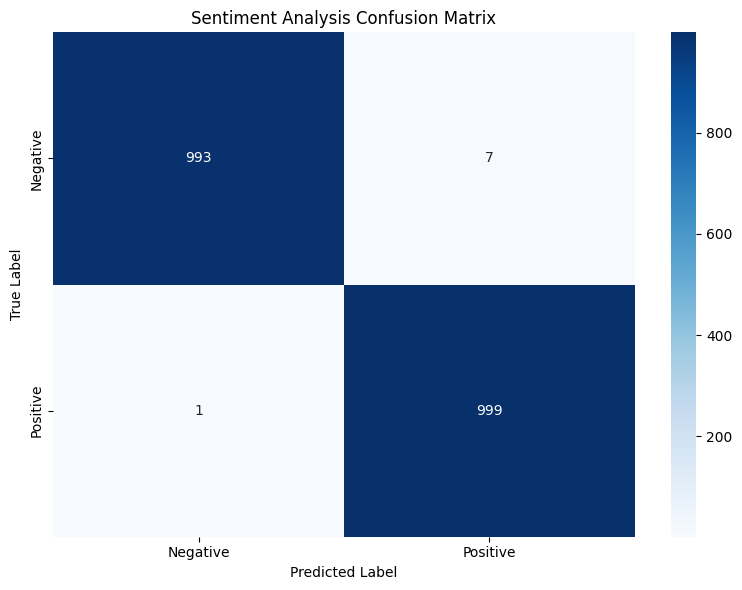


Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.99      1.00      1000
    Positive       0.99      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [61]:
# Plot confusion matrix
evaluator.plot_confusion_matrix(
    y_true=evaluation_results['true_labels'],
    y_pred=evaluation_results['predictions'],
    title='Sentiment Analysis Confusion Matrix'
)

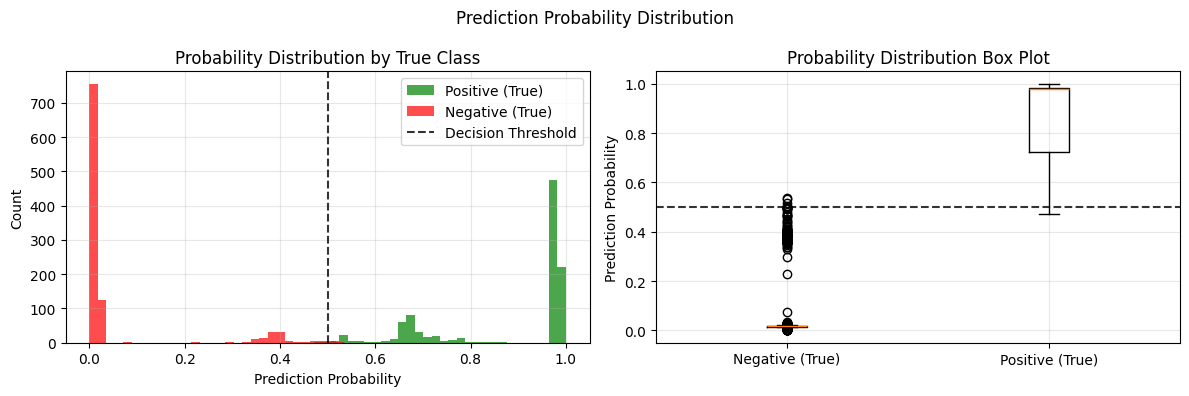

In [62]:
# Plot prediction distribution
evaluator.plot_prediction_distribution(
    y_pred_proba=evaluation_results['probabilities'],
    y_true=evaluation_results['true_labels'],
    title='Prediction Probability Distribution'
)

## 7. Error Analysis

In [63]:
# Analyze prediction errors
error_analysis = evaluator.analyze_errors(
    model=model,
    test_texts=test_x,
    X_test=X_test,
    y_test=test_y,
    process_tweet_func=process_tweet,
    max_errors=10,
    verbose=True
)

ERROR ANALYSIS
Total errors: 8 out of 2000 samples
Error rate: 0.0040

Error #1 - FALSE NEGATIVE
Original: @msarosh Uff Itna Miss karhy thy ap :p
Processed: uff itna miss karhi thi ap :p
True: 1, Predicted: 0 (prob: 0.4714)
------------------------------
Error #2 - FALSE POSITIVE
Original: @phenomyoutube u probs had more fun with david than me : (
Processed: u prob fun david
True: 0, Predicted: 1 (prob: 0.5325)
------------------------------
Error #3 - FALSE POSITIVE
Original: pats jay : (
Processed: pat jay
True: 0, Predicted: 1 (prob: 0.5010)
------------------------------
Error #4 - FALSE POSITIVE
Original: @bae_ts WHATEVER STIL L YOUNG &gt;:-(
Processed: whatev stil l young >:-(
True: 0, Predicted: 1 (prob: 0.5003)
------------------------------
Error #5 - FALSE POSITIVE
Original: my beloved grandmother : ( https://t.co/wt4oXq5xCf
Processed: belov grandmoth
True: 0, Predicted: 1 (prob: 0.5000)
------------------------------
Error #6 - FALSE POSITIVE
Original: @CHEDA_KHAN Thats life

## 8. Test on Custom Tweets

In [64]:
# Test on custom tweets
custom_tweets = [
    "I love this movie!",
    "This is terrible",
    "I am so happy today",
    "I hate Mondays",
    "Great job everyone!",
    "This is boring",
    "Amazing experience",
    "Not good at all",
    "Fantastic work",
    "I feel sad"
]

# Test custom tweets
custom_results = evaluator.test_custom_tweets(
    model=model,
    custom_tweets=custom_tweets,
    extract_features_func=extract_features,
    freqs=freqs,
    process_tweet_func=process_tweet,
    verbose=True
)

CUSTOM TWEET PREDICTIONS
Tweet: I love this movie!
Sentiment: Positive (confidence: 0.5716)
------------------------------
Tweet: This is terrible
Sentiment: Negative (confidence: 0.5024)
------------------------------
Tweet: I am so happy today
Sentiment: Positive (confidence: 0.5509)
------------------------------
Tweet: I hate Mondays
Sentiment: Negative (confidence: 0.5093)
------------------------------
Tweet: Great job everyone!
Sentiment: Positive (confidence: 0.5565)
------------------------------
Tweet: This is boring
Sentiment: Negative (confidence: 0.5023)
------------------------------
Tweet: Amazing experience
Sentiment: Positive (confidence: 0.5111)
------------------------------
Tweet: Not good at all
Sentiment: Positive (confidence: 0.5377)
------------------------------
Tweet: Fantastic work
Sentiment: Positive (confidence: 0.5029)
------------------------------
Tweet: I feel sad
Sentiment: Negative (confidence: 0.5519)
------------------------------


In [65]:
# Recreate evaluator instance with updated methods
evaluator = ModelEvaluator()
print("✅ Evaluator recreated with updated methods!")

✅ Evaluator recreated with updated methods!


In [66]:
# Interactive prediction function
def predict_sentiment(tweet_text):
    """Interactive function to predict sentiment"""
    result = predict_tweet_sentiment(
        model=model,
        tweet=tweet_text,
        extract_features_func=extract_features,
        freqs=freqs,
        process_tweet_func=process_tweet,
        verbose=True
    )
    return result

# Try it out!
print("Try predicting sentiment for your own tweets:")
test_tweet = "I'm feeling excited about this project!"
result = predict_sentiment(test_tweet)

Try predicting sentiment for your own tweets:
Tweet: I'm feeling excited about this project!
Sentiment: Negative (probability: 0.4830)


## 9. Visualize Decision Boundary

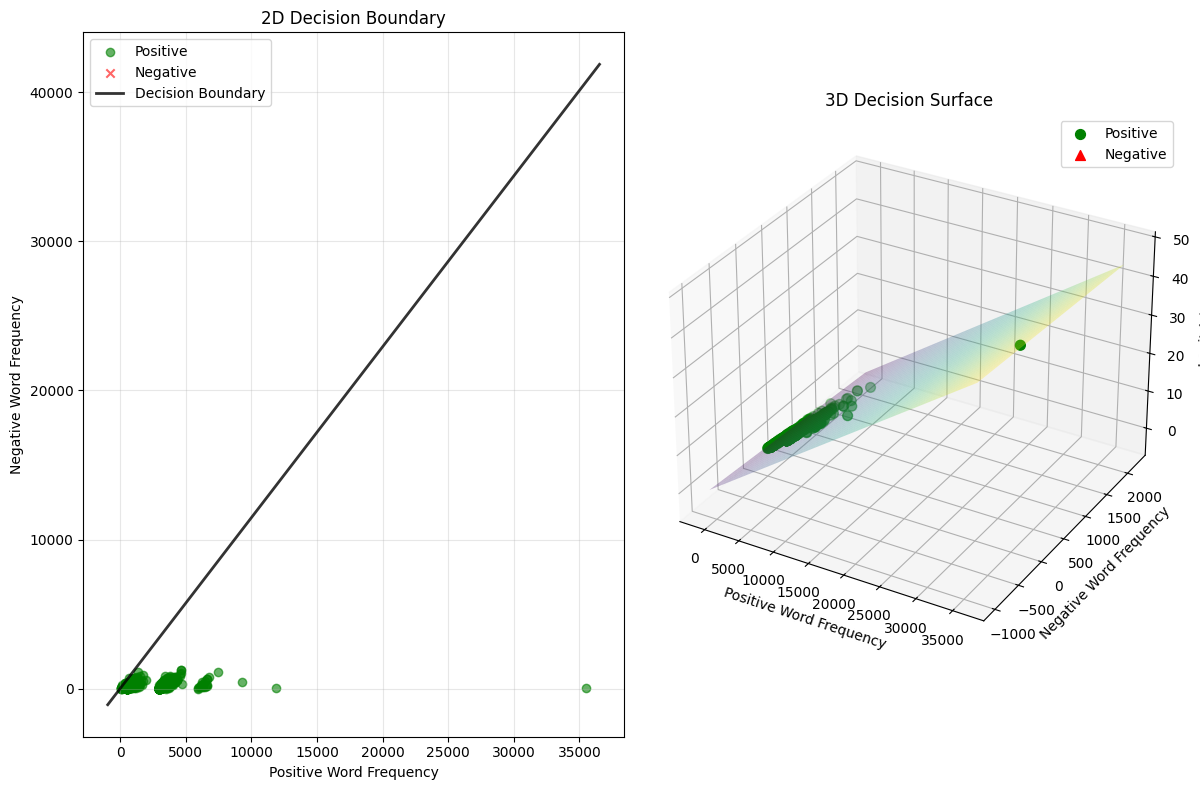

In [67]:
# Plot decision boundary
if hasattr(model, 'plot_decision_boundary'):
    model.plot_decision_boundary(
        X=X_test[:1000],  # Use subset for better visualization
        y=test_y[:1000],
        feature_names=['Bias', 'Positive Frequency', 'Negative Frequency']
    )
else:
    print("Decision boundary visualization not available")

## 10. Save Model and Results

In [68]:
# Prepare processed data for saving
processed_data = {
    'train': {
        'features': X_train,
        'labels': train_y,
        'texts': train_x
    },
    'test': {
        'features': X_test,
        'labels': test_y,
        'texts': test_x
    }
}

# Save all artifacts
save_model_artifacts(
    model=model,
    freqs=freqs,
    processed_data=processed_data,
    save_dir="models"
)

print("Model and all artifacts saved successfully!")

Frequency dictionary saved to models\frequency_dict.pkl and models\frequency_dict.json
All model artifacts saved to models/
Model and all artifacts saved successfully!
